In [ ]:
need = pd.DataFrame(['Data Cleaning', 'EDA', 'Text preprocessing', 'Model Building', 'Evaluation', 'Improvement'], columns = ['Need'])

In [ ]:
need

,Need
0,Data Cleaning
1,EDA
2,Text preprocessing
3,Model Building
4,Evaluation
5,Improvement


In [ ]:
import pandas as pd

In [ ]:
sms = pd.read_csv('spam.csv')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
sms.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.rename(columns = {'v1': 'target', 'v2':'text'}, inplace = True)
sms.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# ham -> 0, spam -> 1
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
sms['target'] = enc.fit_transform(sms['target'])
sms.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
sms.duplicated().sum()

0

In [ ]:
sms = sms.drop_duplicates(keep = 'first')

In [ ]:
need

,Need
0,Data Cleaning
1,EDA
2,Text preprocessing
3,Model Building
4,Evaluation
5,Improvement


# **Exploratoty Data Analysis**

In [ ]:
sms['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe9a8cf28b0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

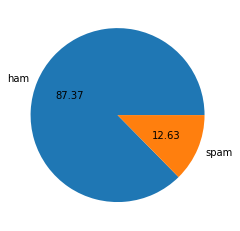

In [ ]:
import matplotlib.pyplot as plt
plt.pie(sms['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")

In [ ]:
sms['num_char'] = sms['text'].apply(len)
sms.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sms['num_words'] = sms['text'].apply(lambda x: len(nltk.word_tokenize(x)))
sms.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
sms['num_sent'] = sms['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
sms.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
sms[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
sms[sms['target'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
sms[sms['target'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [ ]:
import seaborn as sns

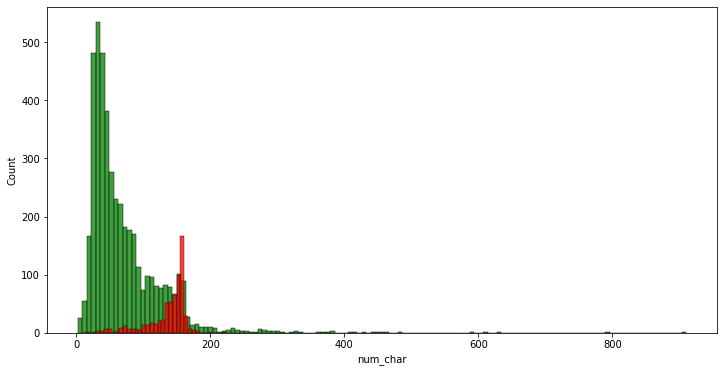

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(sms[sms['target'] == 0]['num_char'], color = 'green')
sns.histplot(sms[sms['target'] == 1]['num_char'], color = 'red')

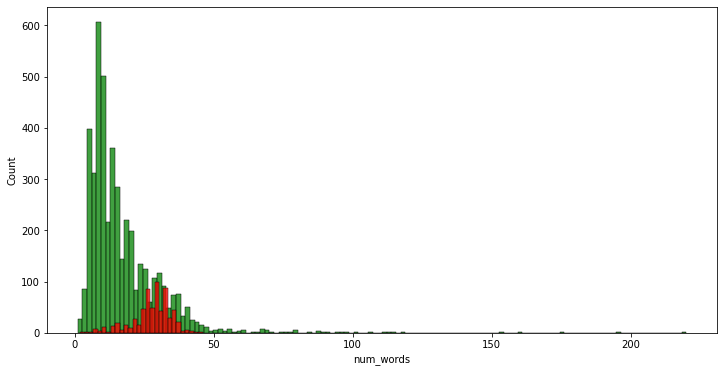

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(sms[sms['target'] == 0]['num_words'], color = 'green')
sns.histplot(sms[sms['target'] == 1]['num_words'], color = 'red')

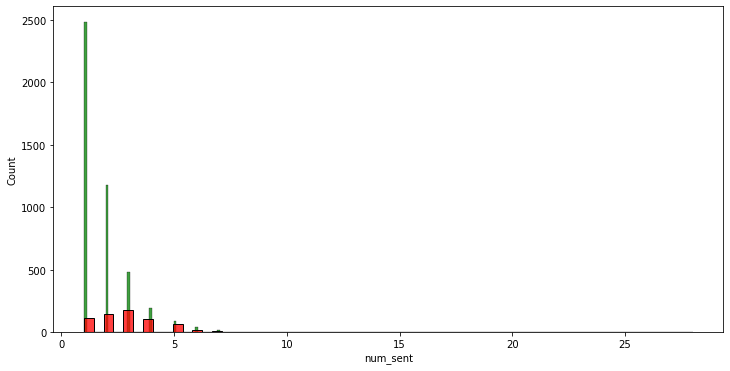

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(sms[sms['target'] == 0]['num_sent'], color = 'green')
sns.histplot(sms[sms['target'] == 1]['num_sent'], color = 'red')

In [ ]:
sms.corr()

,target,num_char,num_words,num_sent
target,1.000000,0.384717,0.262984,0.284901
num_char,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sent,0.284901,0.638143,0.684541,1.000000


In [ ]:
need

,Need
0,Data Cleaning
1,EDA
2,Text preprocessing
3,Model Building
4,Evaluation
5,Improvement


# **Text Preprocessing**

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuations
5. stemming - dance, dancing, -> dance


In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [ ]:
def text_preprocessing(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y.copy()
  y = []
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y.copy()
  y = []
  for i in text:
    y.append(ps.stem(i))

  return ' '.join(y)

In [ ]:
text_preprocessing('I am enjoying Machine Learning projects. what about you?')

'enjoy machin learn project'

In [ ]:
sms['tranformed_text'] = sms['text'].apply(text_preprocessing)
sms.head()

,target,text,num_char,num_words,num_sent,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')

In [ ]:
ham_wc = wc.generate(sms[sms['target'] == 0]['tranformed_text'].str.cat(sep = ' '))

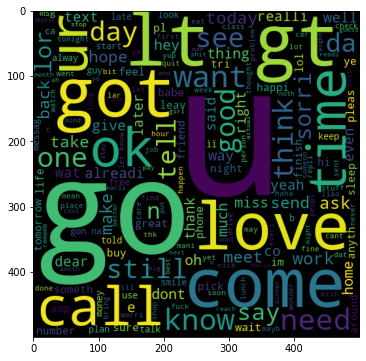

In [ ]:
plt.figure(figsize = (12, 6))
plt.imshow(ham_wc)

In [ ]:
spam_wc = wc.generate(sms[sms['target'] == 1]['tranformed_text'].str.cat(sep = ' '))


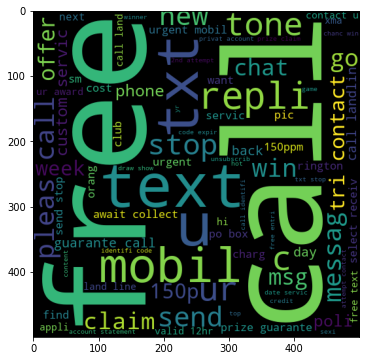

In [ ]:
plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)

In [ ]:
from collections import Counter

ls = sms[sms['target'] == 1]['tranformed_text'].tolist()
words = []
for i in ls:
  for word in i.split(' '):
    words.append(word)

c = Counter(words).most_common(30)
c.sort(key = lambda x: x[1], reverse = True)

In [ ]:
c

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

# **Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
tfidf = TfidfVectorizer(max_features=3000) #1
x = tfidf.fit_transform(sms['tranformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler #2
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [ ]:
# appending the num_character col to X
# x = np.hstack((x,sms['num_char'].values.reshape(-1,1)))

In [ ]:
y = sms['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_preds = gnb.predict(x_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))

0.8907156673114119
0.5576036866359447


In [ ]:
mnb.fit(x_train, y_train)
y_preds = mnb.predict(x_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))

0.9738878143133463
0.9512195121951219


In [ ]:
bnb.fit(x_train, y_train)
y_preds = bnb.predict(x_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))

0.9835589941972921
0.991869918699187


In [ ]:
# cv -> bnb, tfidf -> mnb

# **Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  # clf = svc
  clf.fit(x_train, y_train)
  y_preds = clf.predict(x_test)
  accuracy_scores.append(accuracy_score(y_test, y_preds))
  precision_scores.append(precision_score(y_test, y_preds))

  print('for: ', name)
  print(accuracy_score(y_test, y_preds))
  print(precision_score(y_test, y_preds))


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for:  SVC
0.8665377176015474
0.0
for:  KN
0.8858800773694391
0.8333333333333334
for:  NB
0.9738878143133463
0.9512195121951219
for:  DT
0.9439071566731141
0.8703703703703703
for:  LR
0.965183752417795
0.9553571428571429
for:  RF
0.9680851063829787
0.981651376146789
for:  AdaBoost
0.9642166344294004
0.9316239316239316
for:  BgC
0.9661508704061895
0.8992248062015504
for:  ETC
0.9806576402321083
0.9758064516129032
for:  GBDT
0.9516441005802708
0.9313725490196079
for:  xgb
0.9497098646034816
0.93


In [ ]:
# df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending = False)
# df

# **Model Improvement**

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
new_df = df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,GBDT,0.952611,0.923810,0.947776,0.920000
8,xgb,0.950677,0.922330,0.943907,0.934783
9,BgC,0.958414,0.862595,0.957447,0.867188


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [ ]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000
8,xgb,0.950677,0.922330,0.943907,0.934783,0.943907,0.934783
9,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.885880,0.833333
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.973888,0.951220
2,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759,0.968085,0.981651
3,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576,0.980658,0.975806
4,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.965184,0.955357
7,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000,0.951644,0.931373
8,xgb,0.950677,0.922330,0.943907,0.934783,0.943907,0.934783,0.949710,0.930000
9,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188,0.966151,0.899225
